<img src="https://devra.ai/analyst/notebook/1433/image.jpg" style="width: 100%; height: auto;" />

<div style="text-align:center; border-radius:15px; padding:15px; color:white; margin:0; font-family: 'Orbitron', sans-serif; background: #2E0249; background: #11001C; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.3); overflow:hidden; margin-bottom: 1em;">
  <div style="font-size:150%; color:#FEE100"><b>Temperature Data Analysis Notebook</b></div>
  <div>This notebook was created with the help of <a href="https://devra.ai/ref/kaggle" style="color:#6666FF">Devra AI</a></div>
</div>

Few may presume that climate change statistics are dry; our dataset will show that the numbers tell a story full of surprises and predictions. If you find this notebook useful, please upvote it.

## Table of Contents

1. [Data Loading](#Data-Loading)
2. [Data Cleaning and Preprocessing](#Data-Cleaning-and-Preprocessing)
3. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
4. [Visualization and Analysis](#Visualization-and-Analysis)
5. [Prediction and Model Building](#Prediction-and-Model-Building)
6. [Conclusion and Future Work](#Conclusion-and-Future-Work)

In [1]:
# Import and setup libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('Agg')  # Necessary backend setting
import matplotlib.pyplot as plt
plt.switch_backend('Agg')  # switch backend if only plt imported

import seaborn as sns
sns.set(style='whitegrid', palette='muted', color_codes=True)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Ensure inline plotting (Kaggle specific)
%matplotlib inline

# Set a random seed for reproducibility
RANDOM_STATE = 42

print('Libraries imported and backend configured.')

Libraries imported and backend configured.


## Data Loading

In this section we load the temperature dataset. The data contains yearly records per country and features such as average temperature, CO2 emissions, sea level rise, rainfall, and more. Although the year is an integer, it represents a time component so it can be treated as a date-type feature when necessary.

In [2]:
# Load the dataset
file_path = '/kaggle/input/temperature/temperature.csv'
try:
    df = pd.read_csv(file_path, encoding='ascii', delimiter=',')
    print('Data loaded successfully, sample records below:')
    display(df.head())
except Exception as error:
    print('Error loading the dataset. Check file path or encoding settings.')
    print(error)

Data loaded successfully, sample records below:


,Year,Country,Avg_Temperature_degC,CO2_Emissions_tons_per_capita,Sea_Level_Rise_mm,Rainfall_mm,Population,Renewable_Energy_pct,Extreme_Weather_Events,Forest_Area_pct
0,2006,UK,8.9,9.3,3.1,1441,530911230,20.4,14,59.8
1,2019,USA,31.0,4.8,4.2,2407,107364344,49.2,8,31.0
2,2014,France,33.9,2.8,2.2,1241,441101758,33.3,9,35.5
3,2010,Argentina,5.9,1.8,3.2,1892,1069669579,23.7,7,17.7
4,2007,Germany,26.9,5.6,2.4,1743,124079175,12.5,4,17.4


## Data Cleaning and Preprocessing

We start by checking for missing values and potential data type issues. It is common for datasets to have imperfections and while the schema here is defined, errors may occur during the realization. Any necessary type conversions are done in this step. Enjoy the beauty of clean data.

In [3]:
# Basic data exploration
print('Dataset shape:', df.shape)
print('\nDataset info:')
df.info()

# Check for missing values
print('\nMissing values per column:')
print(df.isnull().sum())

# Handle missing values if any (using median imputation for numeric columns as an example)
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f'Filled missing values in {col} with median value {median_val}')

# A quick check of data types
print('\nData types after cleaning:')
print(df.dtypes)

Dataset shape: (1000, 10)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           1000 non-null   int64  
 1   Country                        1000 non-null   object 
 2   Avg_Temperature_degC           1000 non-null   float64
 3   CO2_Emissions_tons_per_capita  1000 non-null   float64
 4   Sea_Level_Rise_mm              1000 non-null   float64
 5   Rainfall_mm                    1000 non-null   int64  
 6   Population                     1000 non-null   int64  
 7   Renewable_Energy_pct           1000 non-null   float64
 8   Extreme_Weather_Events         1000 non-null   int64  
 9   Forest_Area_pct                1000 non-null   float64
dtypes: float64(5), int64(4), object(1)
memory usage: 78.2+ KB

Missing values per column:
Year                             0
Country

## Exploratory Data Analysis

Let us now dive into the numerical trends, distributions, and correlations present in our dataset. Notice how several features interact with one another: understanding these relationships will help us in building an effective predictor.

Descriptive statistics for numerical features:


,Year,Avg_Temperature_degC,CO2_Emissions_tons_per_capita,Sea_Level_Rise_mm,Rainfall_mm,Population,Renewable_Energy_pct,Extreme_Weather_Events,Forest_Area_pct
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000
mean,2011.432000,19.883100,10.425800,3.009600,1738.761000,7.053830e+08,27.300500,7.291000,40.572000
std,7.147199,8.542897,5.614665,1.146081,708.976616,4.093910e+08,12.970808,4.422655,17.398998
min,2000.000000,5.000000,0.500000,1.000000,501.000000,3.660891e+06,5.100000,0.000000,10.100000
25%,2005.000000,12.175000,5.575000,2.000000,1098.750000,3.436242e+08,16.100000,3.000000,25.600000
50%,2012.000000,20.100000,10.700000,3.000000,1726.000000,7.131166e+08,27.150000,8.000000,41.150000
75%,2018.000000,27.225000,15.400000,4.000000,2362.500000,1.073868e+09,38.925000,11.000000,55.800000
max,2023.000000,34.900000,20.000000,5.000000,2999.000000,1.397016e+09,50.000000,14.000000,70.000000


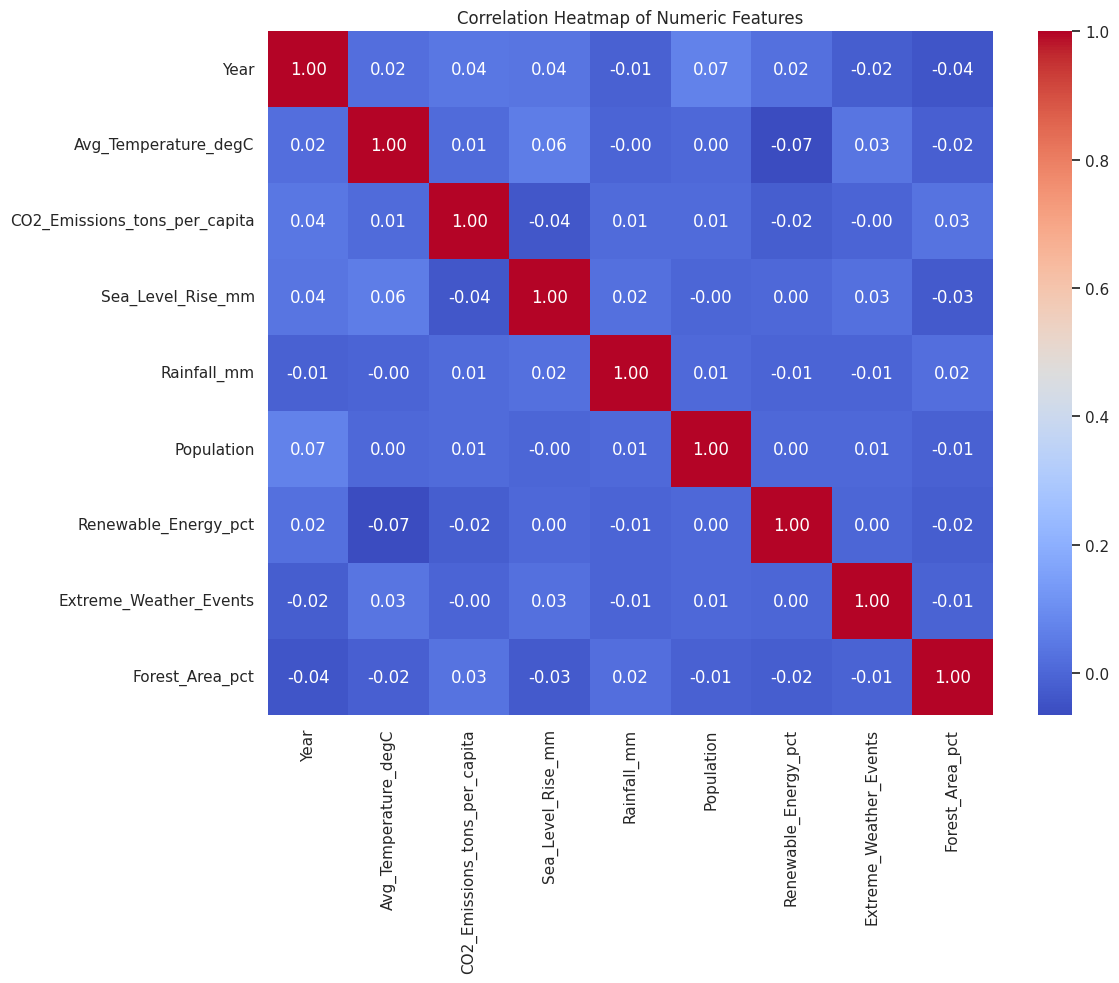

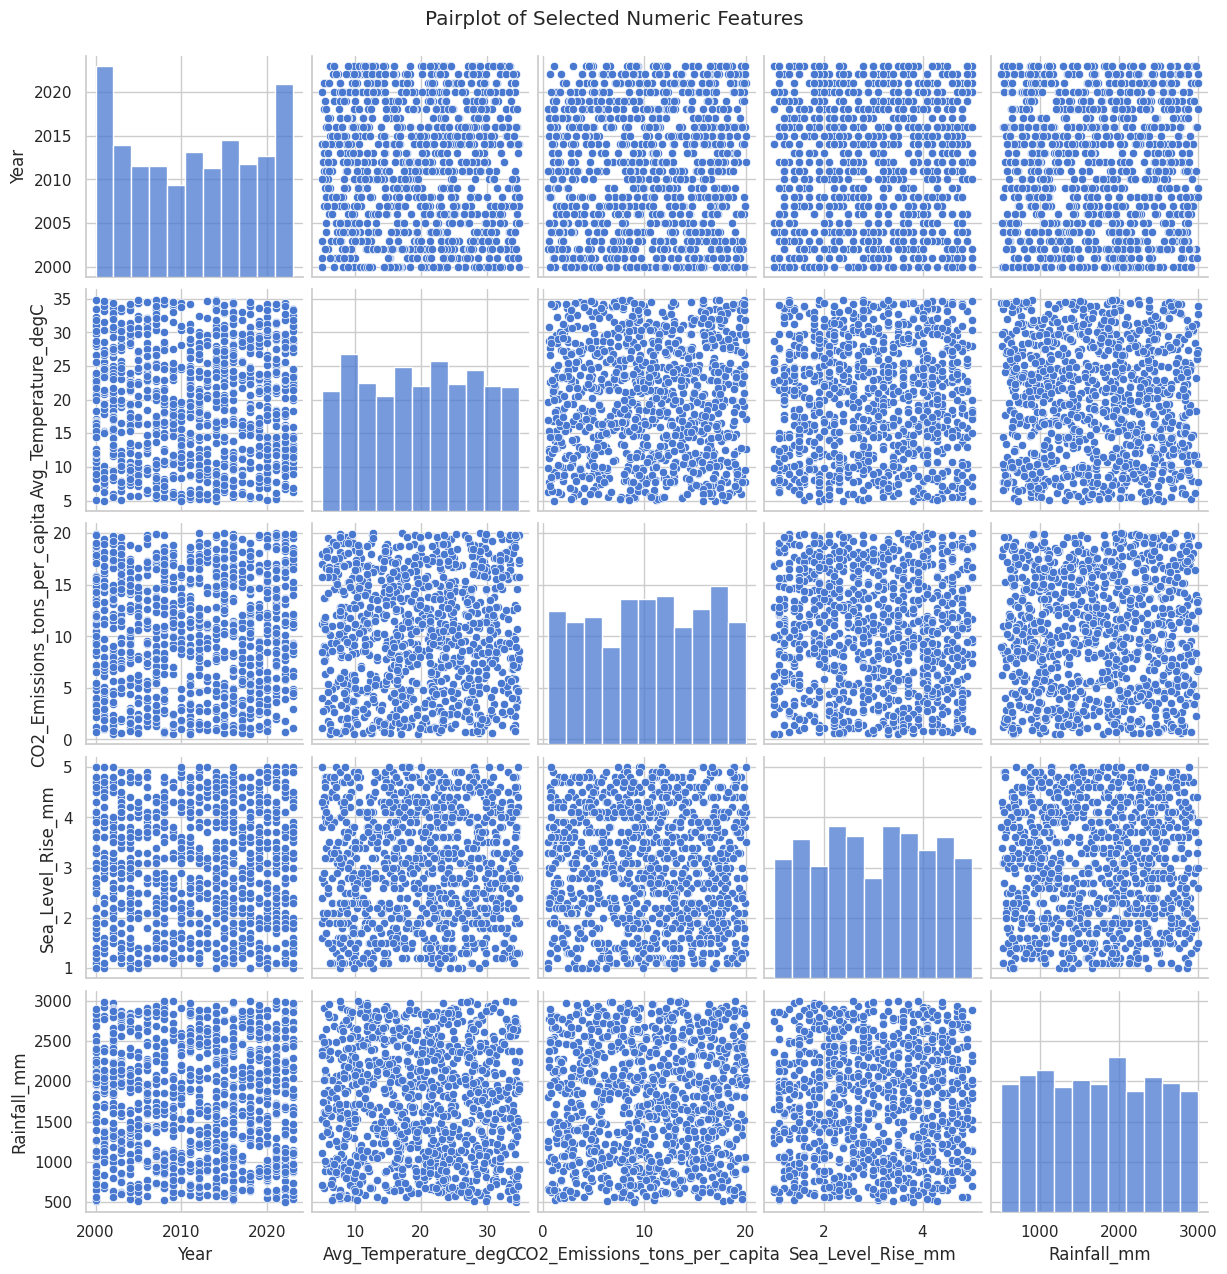

In [4]:
# Descriptive statistics
print('Descriptive statistics for numerical features:')
display(df.describe())

# Correlation analysis on numeric data
numeric_df = df.select_dtypes(include=[np.number])
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(12, 10))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.tight_layout()
    plt.show()
else:
    print('Not enough numeric columns for a correlation heatmap.')

# Pairplot for a subset of numeric columns to inspect bivariate relationships
sample_cols = [col for col in ['Year', 'Avg_Temperature_degC', 'CO2_Emissions_tons_per_capita',
                               'Sea_Level_Rise_mm', 'Rainfall_mm'] if col in numeric_df.columns]
if len(sample_cols) >= 2:
    sns.pairplot(df[sample_cols].dropna())
    plt.suptitle('Pairplot of Selected Numeric Features', y=1.02)
    plt.show()
else:
    print('Not enough variables for a meaningful pairplot.')

## Visualization and Analysis

Time to visualize categorical trends and distribution shapes. We apply several plot types: histograms for distribution, box plots for outlier detection, and count plots for categorical frequencies.

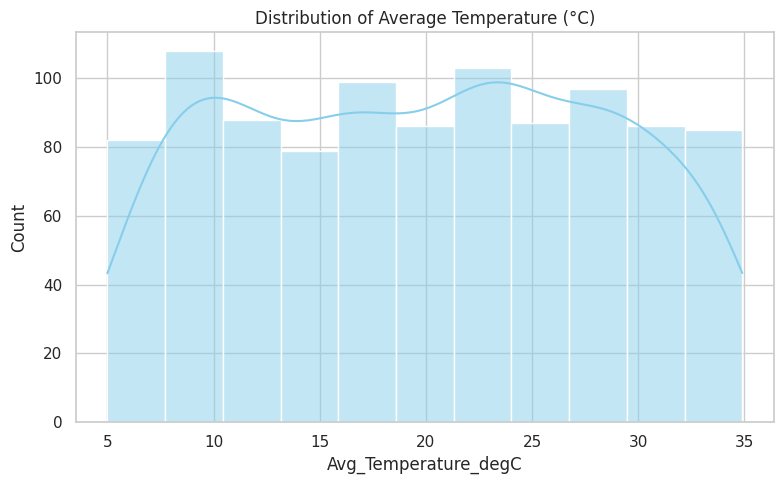

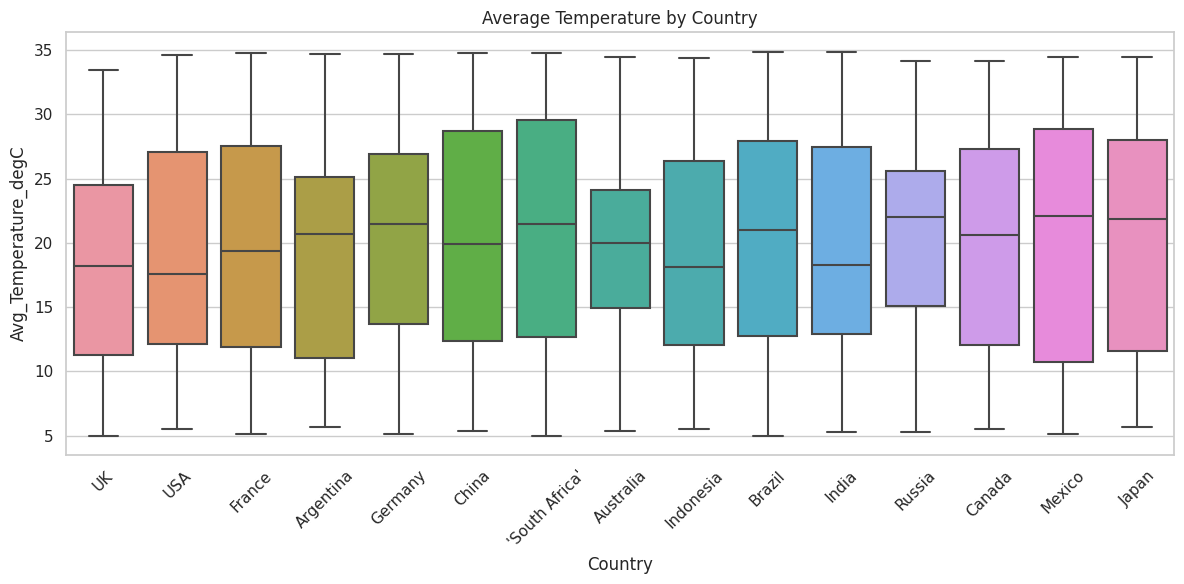

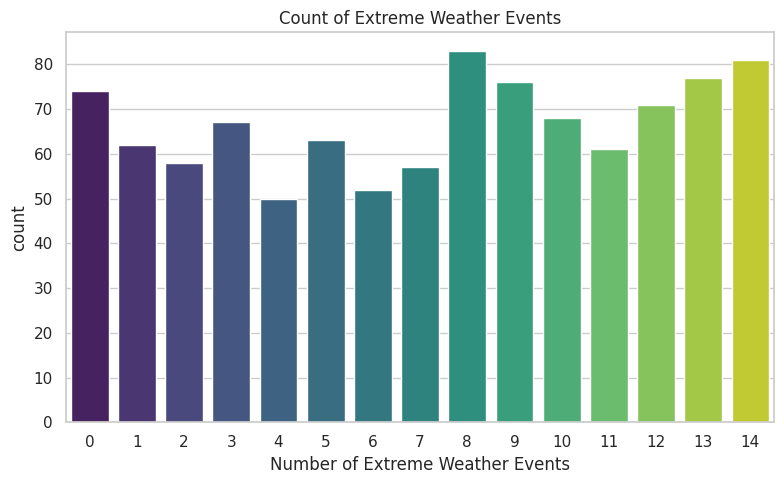

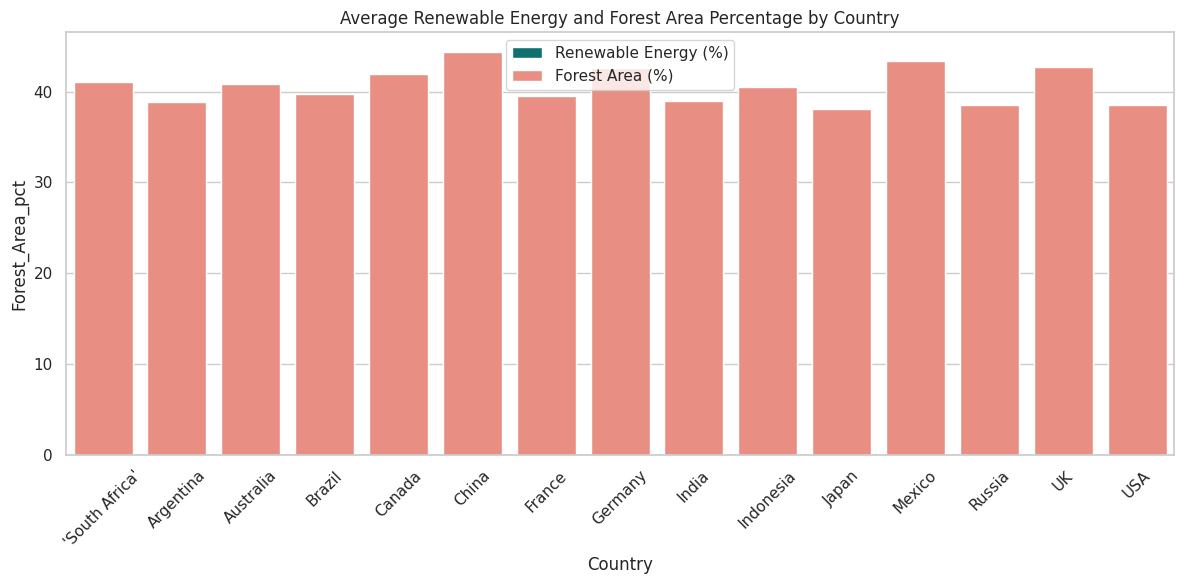

In [5]:
# Histogram of Average Temperature
plt.figure(figsize=(8, 5))
sns.histplot(df['Avg_Temperature_degC'].dropna(), kde=True, color='skyblue')
plt.title('Distribution of Average Temperature (°C)')
plt.xlabel('Avg_Temperature_degC')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Box Plot for Avg Temperature by Country
plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='Avg_Temperature_degC', data=df)
plt.title('Average Temperature by Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Count plot for Extreme Weather Events
plt.figure(figsize=(8, 5))
sns.countplot(x='Extreme_Weather_Events', data=df, palette='viridis')
plt.title('Count of Extreme Weather Events')
plt.xlabel('Number of Extreme Weather Events')
plt.tight_layout()
plt.show()

# Grouped Barplot: Renewable Energy vs. Forest Area by Country (aggregated)
agg_df = df.groupby('Country')[['Renewable_Energy_pct', 'Forest_Area_pct']].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Renewable_Energy_pct', data=agg_df, color='teal', label='Renewable Energy (%)')
sns.barplot(x='Country', y='Forest_Area_pct', data=agg_df, color='salmon', label='Forest Area (%)')
plt.title('Average Renewable Energy and Forest Area Percentage by Country')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## Prediction and Model Building

In this section we build a simple predictor. Feeling ambitious, we model the average temperature using a selection of available features. We use a Linear Regression model and evaluate the performance using the R² score and RMSE. Occasionally, modeling surprises us if the signal is weak. The predictor might be improved with further feature engineering in future work.

Data split into training and test sets.
Linear Regression R² score: 0.006
Linear Regression RMSE: 8.298


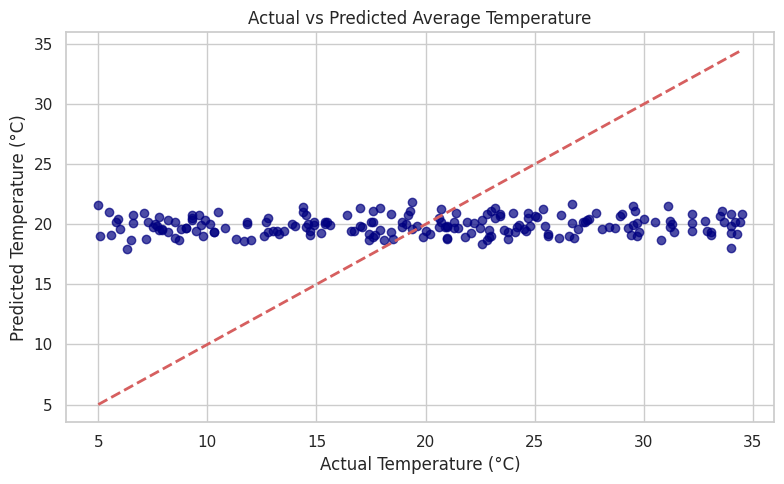

In [6]:
# Prepare data for prediction
target = 'Avg_Temperature_degC'

# Choose features: excluding Country since it's categorical, although we could encode it
features = ['Year', 'CO2_Emissions_tons_per_capita', 'Sea_Level_Rise_mm',
            'Rainfall_mm', 'Population', 'Renewable_Energy_pct',
            'Extreme_Weather_Events', 'Forest_Area_pct']

# Drop rows with missing target or features
model_df = df[features + [target]].dropna()

# Define X and y
X = model_df[features]
y = model_df[target]

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)
print('Data split into training and test sets.')

# Instantiate and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Evaluate model performance
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Linear Regression R² score: {r2:.3f}')
print(f'Linear Regression RMSE: {rmse:.3f}')

# Plot actual vs predicted values
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color='navy')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Average Temperature')
plt.xlabel('Actual Temperature (°C)')
plt.ylabel('Predicted Temperature (°C)')
plt.tight_layout()
plt.show()

## Conclusion and Future Work

This notebook analyzed temperature data from multiple countries over the years. We explored data cleaning, performed several visualizations, and built a Linear Regression predictor to forecast average temperatures based on environmental indicators. Although the predictor provides a baseline performance, future work could include:

- More feature engineering (e.g., encoding country information, temporal trends analysis)
- Experimenting with advanced models such as Random Forests or Gradient Boosted Trees
- Incorporating more domain-specific metrics or external data sources

We hope you found this analysis engaging and insightful. Please upvote if you found it useful. Happy data exploring!